<a href="https://colab.research.google.com/github/anushka012/Movie-Recommendation-System/blob/main/movierecommendtion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Get the data
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
  
path = '/content/file.tsv'
  
df = pd.read_csv(path, sep='\t', names=column_names)

In [ ]:
# Check the head of the data
df.head(10)

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
5,22,377,1,878887116
6,244,51,2,880606923
7,166,346,1,886397596
8,298,474,4,884182806
9,115,265,2,881171488


In [ ]:
# Check the tail of the data
df.tail(10)

,user_id,item_id,rating,timestamp
99993,806,421,4,882388897
99994,676,538,4,892685437
99995,721,262,3,877137285
99996,913,209,2,881367150
99997,378,78,3,880056976
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156
100002,12,203,3,879959583


In [ ]:

# Check out all the movies and their respective IDs
movie_titles = pd.read_csv('/content/Movie_Id_Titles.csv')
movie_titles.head(15)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


In [ ]:
movie_titles.tail(15)

,item_id,title
1667,1668,Wedding Bell Blues (1996)
1668,1669,MURDER and murder (1996)
1669,1670,Tainted (1998)
1670,1671,"Further Gesture, A (1996)"
1671,1672,Kika (1993)
1672,1673,Mirage (1995)
1673,1674,Mamma Roma (1962)
1674,1675,"Sunchaser, The (1996)"
1675,1676,"War at Home, The (1996)"
1676,1677,Sweet Nothing (1995)


In [ ]:
data = pd.merge(df, movie_titles, on='item_id')
data.head(15)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
5,274,50,5,878944679,Star Wars (1977)
6,227,50,4,879035347,Star Wars (1977)
7,99,50,5,885679998,Star Wars (1977)
8,305,50,5,886321799,Star Wars (1977)
9,108,50,4,879879739,Star Wars (1977)


In [ ]:
data.tail(15)

,user_id,item_id,rating,timestamp,title
99988,655,1638,3,887488947,Normal Life (1996)
99989,782,1667,3,891500110,"Next Step, The (1995)"
99990,851,1675,3,884222085,"Sunchaser, The (1996)"
99991,234,1460,3,892335460,Sleepover (1995)
99992,532,1594,4,893115576,Everest (1998)
99993,416,1594,5,893212484,Everest (1998)
99994,648,1626,1,884795447,Nobody Loves Me (Keiner liebt mich) (1994)
99995,655,1645,4,892871225,"Butcher Boy, The (1998)"
99996,747,1659,1,888733313,Getting Away With Murder (1996)
99997,916,1682,3,880845755,Scream of Stone (Schrei aus Stein) (1991)


In [ ]:
# Calculate mean rating of all movies
data.groupby('title')['rating'].mean().sort_values(ascending=False).head(15)

title
Marlene Dietrich: Shadow and Light (1996)            5.000
Prefontaine (1997)                                   5.000
Santa with Muscles (1996)                            5.000
Star Kid (1997)                                      5.000
Someone Else's America (1995)                        5.000
Entertaining Angels: The Dorothy Day Story (1996)    5.000
Saint of Fort Washington, The (1993)                 5.000
Great Day in Harlem, A (1994)                        5.000
They Made Me a Criminal (1939)                       5.000
Aiqing wansui (1994)                                 5.000
Pather Panchali (1955)                               4.625
Anna (1996)                                          4.500
Everest (1998)                                       4.500
Maya Lin: A Strong Clear Vision (1994)               4.500
Some Mother's Son (1996)                             4.500
Name: rating, dtype: float64

In [ ]:
# Calculate count rating of all movies
data.groupby('title')['rating'].count().sort_values(ascending=False).head(15)

title
Star Wars (1977)                    584
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
Toy Story (1995)                    452
Air Force One (1997)                431
Independence Day (ID4) (1996)       429
Raiders of the Lost Ark (1981)      420
Godfather, The (1972)               413
Pulp Fiction (1994)                 394
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Name: rating, dtype: int64

In [ ]:
# creating dataframe with 'rating' count values
ratings = pd.DataFrame(data.groupby('title')['rating'].mean()) 
  
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
  
ratings.head(15)

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


In [ ]:
#visualizing imports
sns.set_style('white')
%matplotlib inline

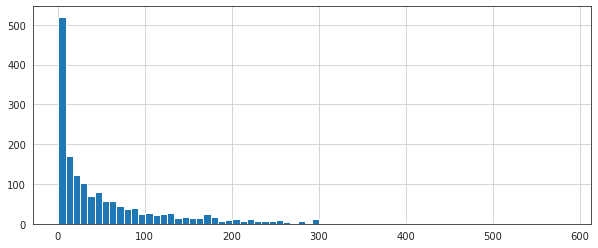

In [ ]:
# plot graph of 'num of ratings column'
plt.figure(figsize =(10, 4))
  
ratings['num of ratings'].hist(bins = 70)

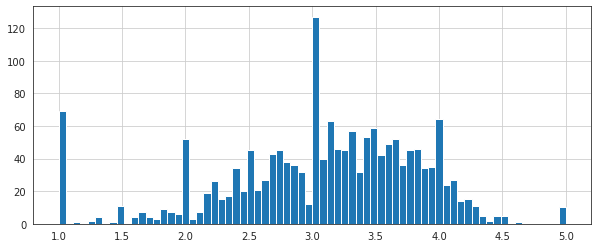

In [ ]:
# plot graph of 'ratings' column
plt.figure(figsize =(10, 4))
  
ratings['rating'].hist(bins = 70)

In [ ]:
# Sorting values according to 
# the 'num of rating column'
moviemat = data.pivot_table(index ='user_id',
              columns ='title', values ='rating')
  
moviemat.head()
  
ratings.sort_values('num of ratings', ascending = False).head(15)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [ ]:
# analysing correlation with similar movies
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
  
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [ ]:
# analysing correlation with similar movies
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)
  
corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation'])
corr_starwars.dropna(inplace = True)
  
corr_starwars.head()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
